# Feature Engineering

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
import os 
import glob
import warnings
warnings.filterwarnings('ignore')

### Data Ingestion

In [2]:
file_path = r"F:\Data Science Projects\Bank_Telemarketing\Bank_Telemarketing\artifacts\bank_train.csv"

In [3]:
df = pd.read_csv(file_path)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,technician,married,high.school,no,no,no,telephone,may,tue,...,12,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1,35,management,married,university.degree,no,yes,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
2,46,admin.,divorced,university.degree,no,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,36,management,married,university.degree,no,yes,no,cellular,nov,wed,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
4,23,student,single,high.school,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30570 entries, 0 to 30569
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30570 non-null  int64  
 1   job             30570 non-null  object 
 2   marital         30570 non-null  object 
 3   education       30570 non-null  object 
 4   default         30570 non-null  object 
 5   housing         30570 non-null  object 
 6   loan            30570 non-null  object 
 7   contact         30570 non-null  object 
 8   month           30570 non-null  object 
 9   day_of_week     30570 non-null  object 
 10  duration        30570 non-null  int64  
 11  campaign        30570 non-null  int64  
 12  pdays           30570 non-null  int64  
 13  previous        30570 non-null  int64  
 14  poutcome        30570 non-null  object 
 15  emp.var.rate    30570 non-null  float64
 16  cons.price.idx  30570 non-null  float64
 17  cons.conf.idx   30570 non-null 

### Data Wrangling

In [5]:
mask_cat = lambda x: df[x].dtype == 'O'
cat_cols = list(filter(mask_cat,df.columns))
cat_cols.remove('y')
print('Categorical Features: ',cat_cols)

Categorical Features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [6]:
mask_num = lambda x: df[x].dtype != 'O'
num_cols = list(filter(mask_num,df.columns))
print('Numerical Features: ',num_cols)

Numerical Features:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [7]:
df_num = df.drop(cat_cols,axis=1)
df_num['y'] = df_num['y'].map(dict(yes=1,no=0))
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,13,12,999,0,1.1,93.994,-36.4,4.856,5191.0,0
1,35,584,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0
2,46,230,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,36,161,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,0
4,23,123,1,999,0,-2.9,92.201,-31.4,0.861,5076.2,0


In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
num_scl = scaler.fit_transform(df_num)
df_num_scl = pd.DataFrame(num_scl,columns=df_num.columns) 
df_num_scl.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.456790,0.020186,0.200000,1.0,0.0,0.937500,0.698753,0.602510,0.957153,0.859735,0.0
1,0.222222,0.906832,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.165722,0.512287,0.0
2,0.358025,0.357143,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0
3,0.234568,0.250000,0.018182,1.0,0.0,0.687500,0.389322,0.368201,0.790297,0.877883,0.0
4,0.074074,0.190994,0.000000,1.0,0.0,0.104167,0.000000,0.811715,0.051462,0.425709,0.0


In [9]:
df_cat = df.drop(num_cols,axis=1)
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,technician,married,high.school,no,no,no,telephone,may,tue,nonexistent,no
1,management,married,university.degree,no,yes,no,cellular,apr,thu,nonexistent,no
2,admin.,divorced,university.degree,no,yes,yes,telephone,may,tue,nonexistent,no
3,management,married,university.degree,no,yes,no,cellular,nov,wed,nonexistent,no
4,student,single,high.school,no,no,no,cellular,aug,mon,nonexistent,no


In [10]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
cat_enc = encoder.fit_transform(df_cat)
df_cat_enc = pd.DataFrame(cat_enc,columns=df_cat.columns)
df_cat_enc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,9.0,1.0,3.0,0.0,0.0,0.0,1.0,6.0,3.0,1.0,0.0
1,4.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,0.0,6.0,0.0,1.0,1.0,1.0,6.0,3.0,1.0,0.0
3,4.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,4.0,1.0,0.0
4,8.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [11]:
df_int = pd.concat([df_cat_enc.drop('y',axis=1),df_num_scl],axis=1)
df_int.reset_index(inplace=True,drop=True)
df_int.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,9.0,1.0,3.0,0.0,0.0,0.0,1.0,6.0,3.0,1.0,...,0.020186,0.200000,1.0,0.0,0.937500,0.698753,0.602510,0.957153,0.859735,0.0
1,4.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,0.906832,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.165722,0.512287,0.0
2,0.0,0.0,6.0,0.0,1.0,1.0,1.0,6.0,3.0,1.0,...,0.357143,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0
3,4.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,4.0,1.0,...,0.250000,0.018182,1.0,0.0,0.687500,0.389322,0.368201,0.790297,0.877883,0.0
4,8.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.190994,0.000000,1.0,0.0,0.104167,0.000000,0.811715,0.051462,0.425709,0.0


### Correlation Studies

Chi-Squared Test

In [12]:
from scipy.stats import chi2_contingency
from itertools import product

cat_var1 = df_cat.columns.to_list()
cat_var2 = df_cat.columns.to_list()

cat_var_prod = list(product(cat_var1,cat_var2,repeat=1))

results = []

for i in cat_var_prod:
    results.append((i[0],i[1],list(chi2_contingency(pd.crosstab(df_cat[i[0]],df_cat[i[1]])))[1]))
    
chi_test_output = pd.DataFrame(results,columns=['var1','var2','pvalue'])
chi_test_pivot = chi_test_output.pivot(index='var1',columns='var2',values='pvalue')
chi_test_pivot

var2,contact,day_of_week,default,education,housing,job,loan,marital,month,poutcome,y
var1,,,,,,,,,,,
contact,0.000000e+00,9.250232e-20,0.730843,9.033567e-91,1.814962e-70,2.260270e-94,7.573819e-03,7.089293e-33,0.000000e+00,0.000000e+00,2.929621e-153
day_of_week,9.250232e-20,0.000000e+00,0.085830,3.059156e-06,1.996541e-03,1.707379e-04,1.115148e-01,2.420966e-02,3.028073e-95,1.855590e-03,2.370379e-03
default,7.308430e-01,8.582980e-02,0.000000,3.329879e-02,1.000000e+00,4.275640e-01,1.000000e+00,5.252633e-01,2.663806e-01,8.542917e-01,1.000000e+00
education,9.033567e-91,3.059156e-06,0.033299,0.000000e+00,3.181104e-03,0.000000e+00,1.204801e-01,2.022385e-260,0.000000e+00,2.606347e-20,7.823570e-48
housing,1.814962e-70,1.996541e-03,1.000000,3.181104e-03,0.000000e+00,1.068218e-01,1.725378e-15,2.941311e-02,5.786030e-39,2.935057e-05,3.925462e-05
job,2.260270e-94,1.707379e-04,0.427564,0.000000e+00,1.068218e-01,0.000000e+00,2.973129e-02,0.000000e+00,0.000000e+00,1.062303e-120,4.433809e-216
loan,7.573819e-03,1.115148e-01,1.000000,1.204801e-01,1.725378e-15,2.973129e-02,0.000000e+00,4.108588e-01,2.414757e-02,9.974441e-01,3.499931e-01
marital,7.089293e-33,2.420966e-02,0.525263,2.022385e-260,2.941311e-02,0.000000e+00,4.108588e-01,0.000000e+00,2.316208e-44,7.927788e-15,2.135353e-29
month,0.000000e+00,3.028073e-95,0.266381,0.000000e+00,5.786030e-39,0.000000e+00,2.414757e-02,2.316208e-44,0.000000e+00,0.000000e+00,0.000000e+00


In [13]:
print('Testing the Statistical Significance of features based on pvalue considering a Confidence Interval of 95%')
mask = chi_test_pivot['y'] <= 0.05
print('Statistically Significant Features: ',mask[mask == True].index.to_list())
print('Statistically Insignificant Features: ',mask[mask == False].index.to_list())

Testing the Statistical Significance of features based on pvalue considering a Confidence Interval of 95%
Statistically Significant Features:  ['contact', 'day_of_week', 'education', 'housing', 'job', 'marital', 'month', 'poutcome', 'y']
Statistically Insignificant Features:  ['default', 'loan']


In [14]:
chi_test_pivot['y'].sort_values()

var1
month           0.000000e+00
poutcome        0.000000e+00
y               0.000000e+00
job            4.433809e-216
contact        2.929621e-153
education       7.823570e-48
marital         2.135353e-29
housing         3.925462e-05
day_of_week     2.370379e-03
loan            3.499931e-01
default         1.000000e+00
Name: y, dtype: float64

Cramer's V [Symmetric: U(x,y) = U(y,x)]

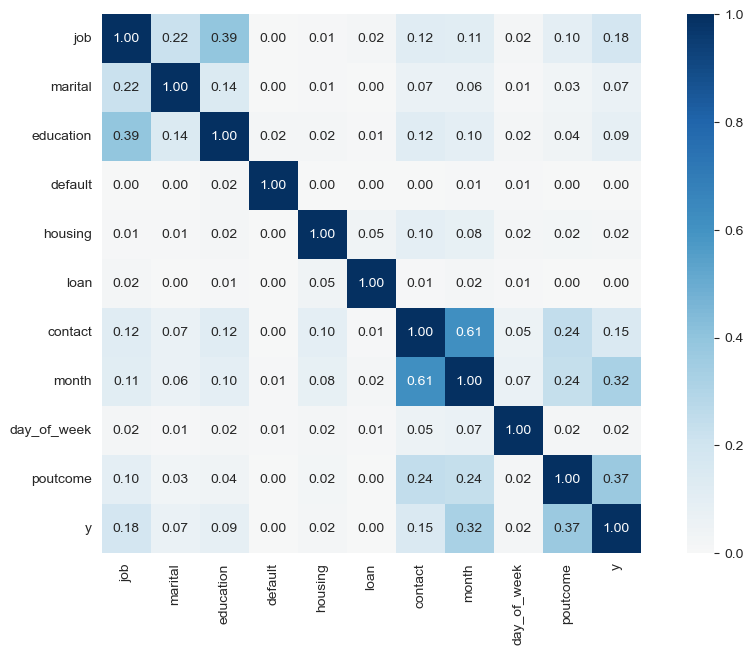

In [15]:
from dython.nominal import associations

fig,ax = plt.subplots(figsize=(12,7))
cramers_v = associations(df_cat,nom_nom_assoc='cramer',ax=ax,cmap='RdBu',vmin=0,vmax=1)

Theil's U [Asymmetric: U(x,y) != U(y,x)]

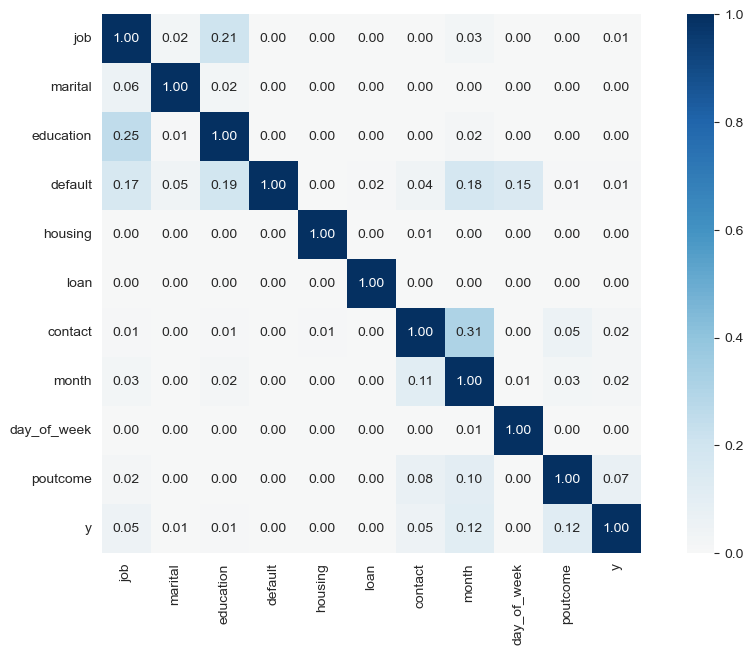

In [16]:
fig,ax = plt.subplots(figsize=(12,7))
theils_u = associations(df_cat,nom_nom_assoc='theil',ax=ax,cmap='RdBu',vmin=0,vmax=1)

Pearson Correlation (Linear Relationships)

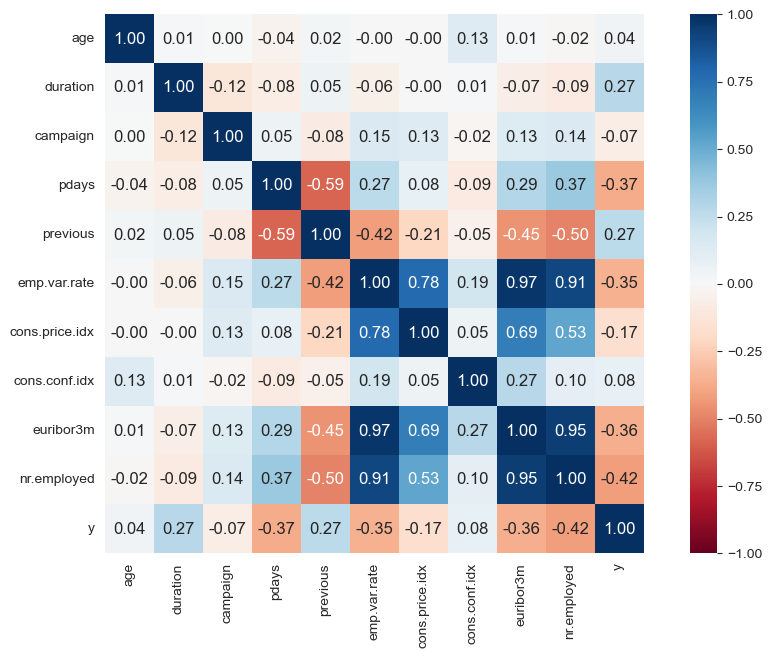

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(df_num_scl.corr(method='pearson',numeric_only=True),square=True,annot=True,fmt='.2f',cmap='RdBu',vmin=-1,vmax=1,annot_kws={'size':12});

Spearman Correlation (Monotonic Relationships)

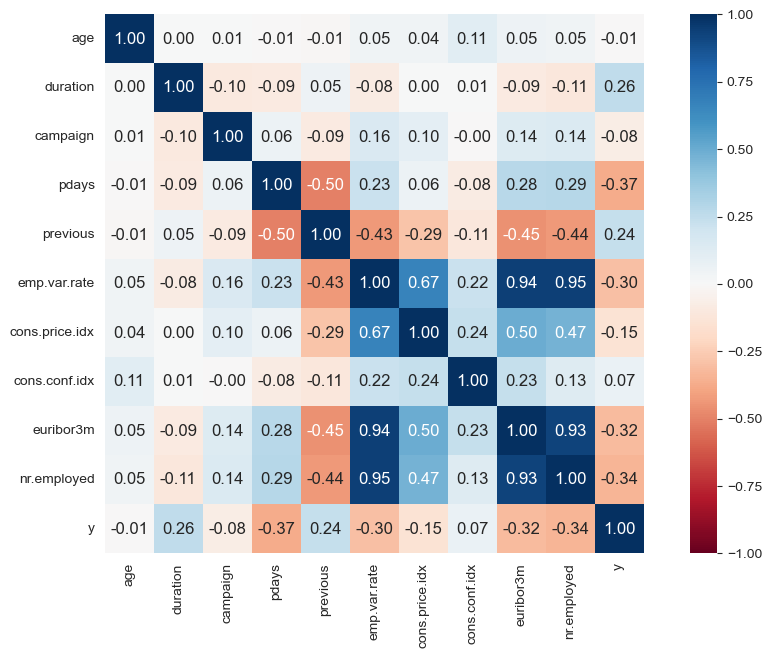

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df_num_scl.corr(method='spearman',numeric_only=True),square=True,annot=True,fmt='.2f',cmap='RdBu',vmin=-1,vmax=1,annot_kws={'size':12});

Point-Biserial Correlation

In [19]:
from scipy.stats import pointbiserialr

corr_pbc = []

for col in df_num_scl.columns:
    corr = np.round(pointbiserialr(df_num_scl[col],df_num_scl['y']).correlation,2)
    pvalue = np.round(pointbiserialr(df_num_scl[col],df_num_scl['y']).pvalue,2)
    corr_pbc.append((col,corr,pvalue))

df_corr_pbc = pd.DataFrame(corr_pbc,columns=['Feature','Correlation','pvalue'])
df_corr_pbc.set_index('Feature',inplace=True)
df_corr_pbc.sort_values(by='Correlation',ascending=False)

,Correlation,pvalue
Feature,,
y,1.00,0.0
duration,0.27,0.0
previous,0.27,0.0
cons.conf.idx,0.08,0.0
age,0.04,0.0
campaign,-0.07,0.0
cons.price.idx,-0.17,0.0
emp.var.rate,-0.35,0.0
euribor3m,-0.36,0.0


### Feature Selection

In [20]:
X_num = df_num_scl.drop('y',axis=1)
X_cat = df_cat_enc.drop('y',axis=1)
X_int = df_int.drop('y',axis=1)
y = df_int['y'].values.reshape(-1,1)
print(X_num.shape)
print(X_cat.shape)
print(X_int.shape)
print(y.shape)

(30570, 10)
(30570, 10)
(30570, 20)
(30570, 1)


#### Filter Methods

Information Gain

In [21]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(X_int,y,n_neighbors=3,random_state=42)
importances = pd.Series(info_gain,index=X_int.columns).sort_values(ascending=False)
importances

euribor3m         0.095461
cons.conf.idx     0.090813
cons.price.idx    0.088412
nr.employed       0.081898
emp.var.rate      0.074545
poutcome          0.040255
pdays             0.039951
duration          0.038656
month             0.034397
previous          0.023686
job               0.015869
contact           0.015227
age               0.014864
housing           0.005588
education         0.004061
campaign          0.003437
marital           0.002014
day_of_week       0.000000
loan              0.000000
default           0.000000
dtype: float64

Variance Threshold

In [22]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X_int)
variances = pd.Series(v_threshold.variances_,index=X_int.columns).sort_values(ascending=False)
variances

job               10.000000
month              5.371532
education          4.269921
day_of_week        1.951129
marital            0.363487
housing            0.248622
contact            0.232379
euribor3m          0.154618
poutcome           0.131070
loan               0.127489
emp.var.rate       0.107463
nr.employed        0.074330
cons.price.idx     0.051215
duration           0.047923
cons.conf.idx      0.037625
pdays              0.034248
age                0.016593
previous           0.004947
campaign           0.002585
default            0.000065
dtype: float64

ANOVA

In [23]:
from sklearn.feature_selection import SelectKBest,f_classif

kbest = SelectKBest(f_classif,k=5)
kbest.fit_transform(X_num,y)
mask = kbest.get_support()
scores = pd.DataFrame({'Score':kbest.scores_.tolist(),'pvalue':kbest.pvalues_.tolist()},index=X_num.columns)
scores = scores.sort_values(by='Score',ascending=False)
print(scores)
print('Top 5 Selected Features: ',X_num.columns[mask].to_list())

                      Score         pvalue
nr.employed     6470.019207   0.000000e+00
pdays           4938.735969   0.000000e+00
euribor3m       4581.019007   0.000000e+00
emp.var.rate    4376.297211   0.000000e+00
duration        2494.784642   0.000000e+00
previous        2406.895846   0.000000e+00
cons.price.idx   857.011890  8.019716e-186
cons.conf.idx    207.191458   8.014622e-47
campaign         156.669394   7.402595e-36
age               53.262632   2.989044e-13
Top 5 Selected Features:  ['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed']


Chi-squared Test

In [24]:
from sklearn.feature_selection import SelectKBest,chi2

chi2 = SelectKBest(chi2,k=5)
chi2.fit_transform(X_cat,y)
mask = chi2.get_support()
scores = pd.DataFrame({'Score':chi2.scores_.tolist(),'pvalue':chi2.pvalues_.tolist()},index=X_cat.columns)
scores = scores.sort_values(by='Score',ascending=False)
print(scores)
print('Top 5 Selected Features: ',X_cat.columns[mask].to_list())

                  Score        pvalue
contact      440.761386  7.391619e-98
education    167.268999  2.921944e-38
job          110.935790  6.111857e-26
poutcome      86.854747  1.167913e-20
marital       28.739942  8.277872e-08
housing        7.905838  4.927550e-03
day_of_week    7.122543  7.612065e-03
loan           0.789726  3.741830e-01
default        0.177350  6.736602e-01
month          0.009067  9.241376e-01
Top 5 Selected Features:  ['job', 'marital', 'education', 'contact', 'poutcome']


### Wrapper Methods

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from sklearn.ensemble import RandomForestClassifier

Forward-Sequential Feature Selection

In [26]:
sfs_for = SequentialFeatureSelector(RandomForestClassifier(random_state=42,n_jobs=-1),direction='forward',n_features_to_select=5,n_jobs=-1)
sfs_for.fit_transform(X_int,y)
mask = sfs_for.get_support()
sfs_for_features = X_int.columns[mask].to_list()
sfs_for_features

['contact', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']

Backward-Sequential Feature Selection

In [27]:
sfs_back = SequentialFeatureSelector(RandomForestClassifier(random_state=42,n_jobs=-1),direction='backward',n_features_to_select=5,n_jobs=-1)
sfs_back.fit_transform(X_int,y)
mask = sfs_back.get_support()
sfs_back_features = X_int.columns[mask].to_list()
sfs_back_features

['poutcome', 'age', 'duration', 'emp.var.rate', 'euribor3m']

Recursive Feature Elimination

In [28]:
rfe = RFE(RandomForestClassifier(random_state=42,n_jobs=-1),n_features_to_select=5)
rfe.fit_transform(X_int,y)
mask = rfe.get_support()
rfe_features = X_int.columns[mask].to_list()
rfe_features

['age', 'duration', 'cons.conf.idx', 'euribor3m', 'nr.employed']

### Embedded Methods

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Logistic Regression Coefficients

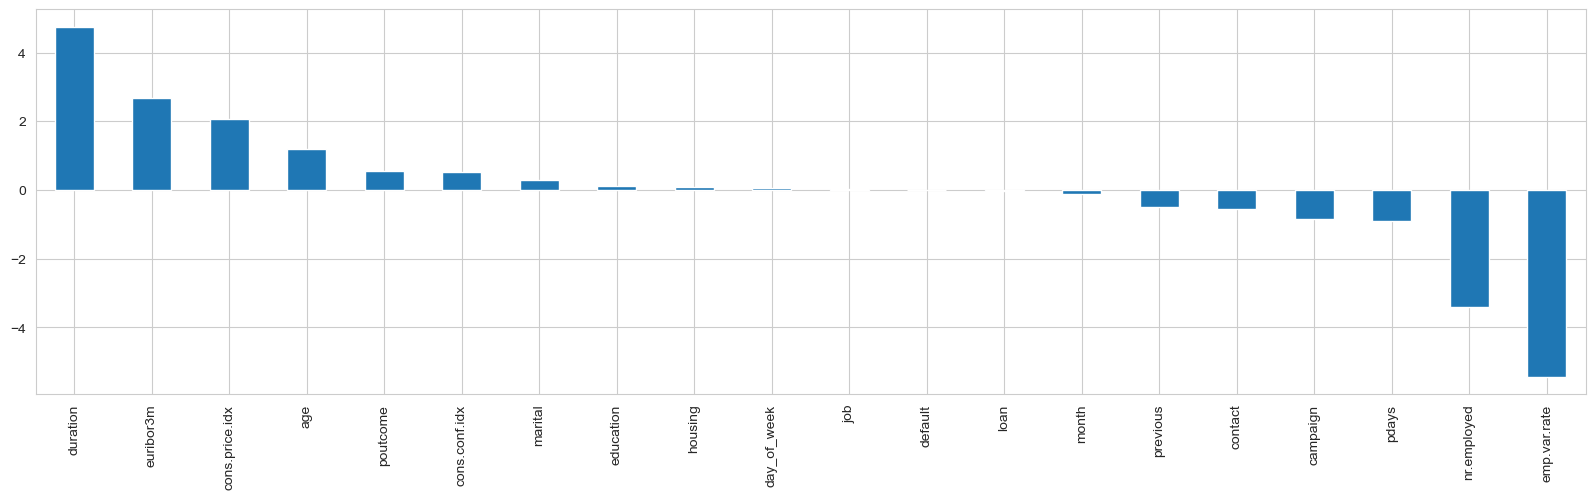

In [30]:
lr = LogisticRegression(C=1e5,random_state=42,n_jobs=-1)
lr.fit(X_int,y)
lr_coef = pd.Series(lr.coef_[0],index=X_int.columns)
lr_coef.sort_values(ascending=False).plot(kind='bar',figsize=(20,5));

Random Forest Feature Importances

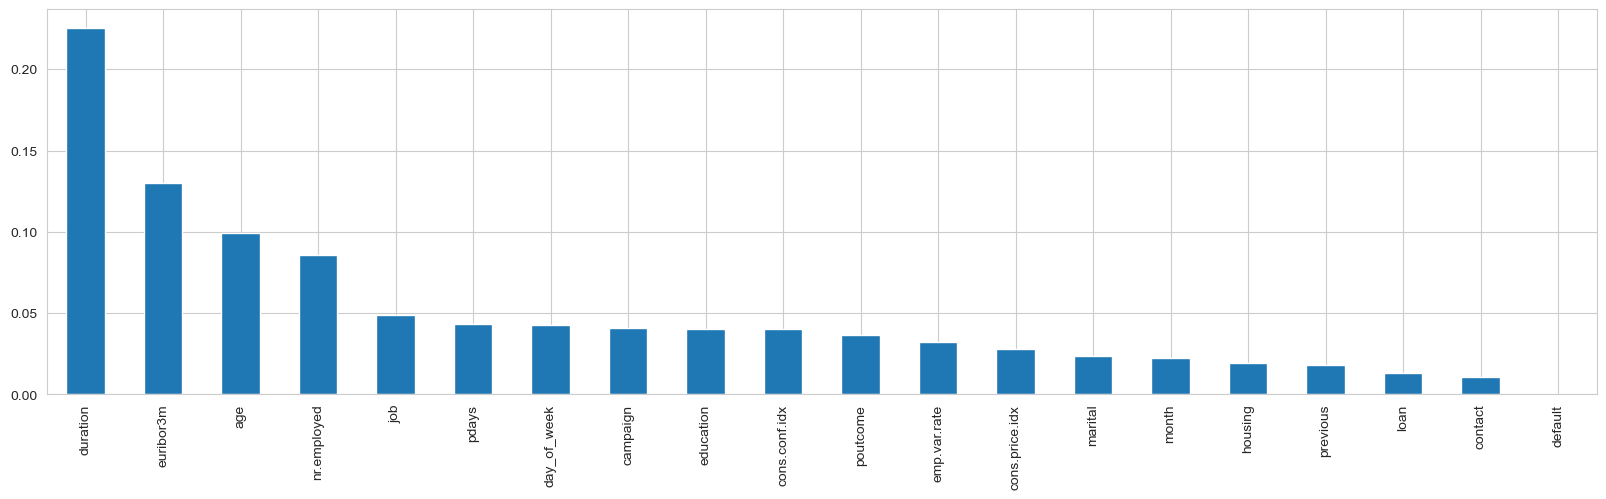

In [31]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)
rfc.fit(X_int,y)
rf_FI = pd.Series(rfc.feature_importances_,index=X_int.columns)
rf_FI.sort_values(ascending=False).plot(kind='bar',figsize=(20,5));

XGBoost Feature Importances

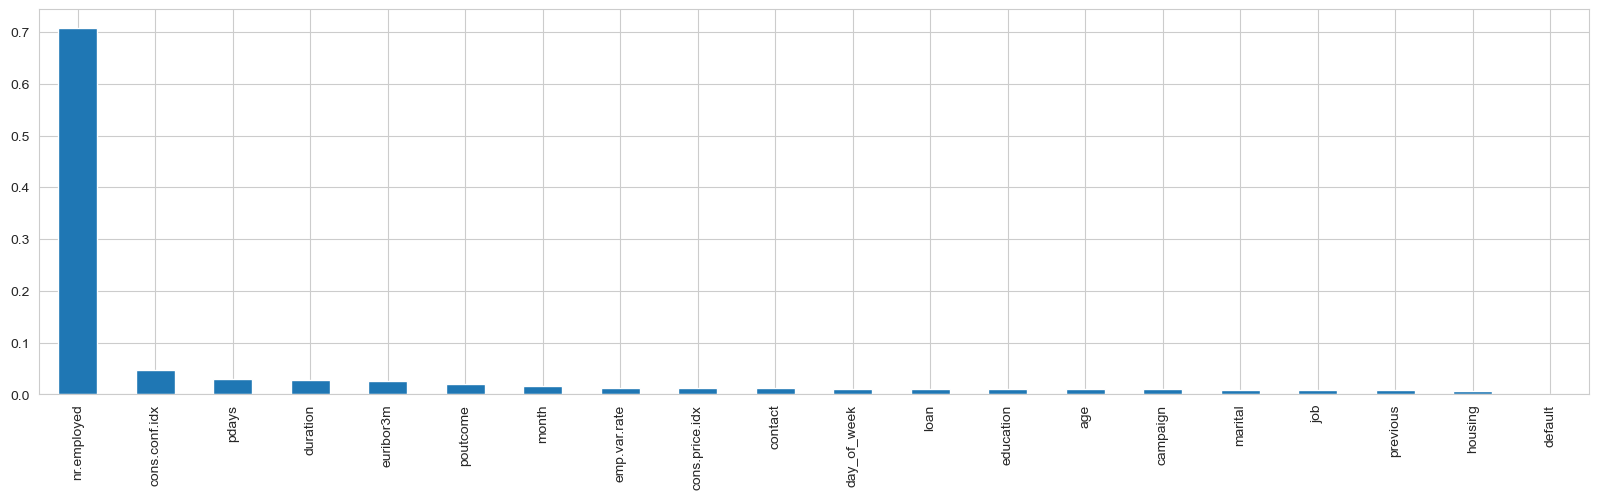

In [32]:
xgbc = XGBClassifier(random_state=42,n_jobs=-1)
xgbc.fit(X_int,y)
xgbc_FI = pd.Series(xgbc.feature_importances_,index=X_int.columns)
xgbc_FI.sort_values(ascending=False).plot(kind='bar',figsize=(20,5));

### Linear Discrimant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<Axes: >

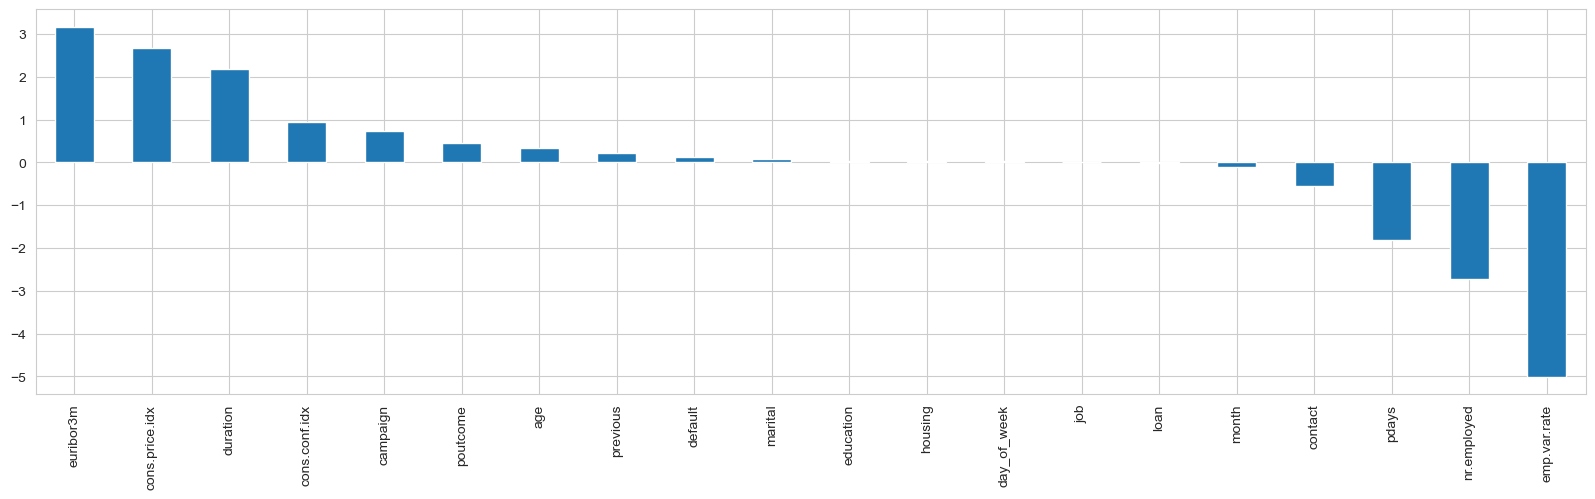

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_int,y)
lda_scalings = pd.Series(lda.scalings_.ravel(),index=X_int.columns)
lda_scalings.sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

### Statistical Regression Analysis - Logistic Regression

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
# X = sm.add_constant(X_int)
glm_model_full = sm.GLM(y,X_int.assign(const=1),family=sm.families.Binomial()).fit()
results_glm_full = glm_model_full.summary()
print(results_glm_full)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30570
Model:                            GLM   Df Residuals:                    30549
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4894.9
Date:                Sun, 28 Jul 2024   Deviance:                       9789.9
Time:                        12:27:41   Pearson chi2:                 1.78e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2168
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
job                0.0131      0.008      1.

In [37]:
# X = sm.add_constant(X_int)
logit_model_full = sm.Logit(y,X_int.assign(const=1)).fit(method='bfgs',maxiter=1000)
results_logit_full = logit_model_full.summary()
print(results_logit_full)

Optimization terminated successfully.
         Current function value: 0.160123
         Iterations: 175
         Function evaluations: 179
         Gradient evaluations: 179
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30570
Model:                          Logit   Df Residuals:                    30549
Method:                           MLE   Df Model:                           20
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.4328
Time:                        12:27:41   Log-Likelihood:                -4895.0
converged:                       True   LL-Null:                       -8630.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
job                0.0132  

Variance Inflation Factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
selected_features = [
                     'duration',
                    #  'nr.employed',
                     'euribor3m',
                    #  'emp.var.rate',
                     'poutcome',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'month'
                     ]

In [40]:
VIF = pd.DataFrame()
VIF['Features'] = selected_features
VIF['VIF'] = [variance_inflation_factor(X_int[selected_features].values,i) for i in range(X_int[selected_features].shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
3,cons.price.idx,12.384856
1,euribor3m,8.863211
2,poutcome,6.799520
4,cons.conf.idx,5.933931
5,month,3.680749
0,duration,2.834454


In [41]:
# X = sm.add_constant(X_int)
glm_model_sel = sm.GLM(y,X_int[selected_features].assign(const=1),family=sm.families.Binomial()).fit()
results_glm_sel = glm_model_sel.summary()
print(results_glm_sel)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30570
Model:                            GLM   Df Residuals:                    30563
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5167.0
Date:                Sun, 28 Jul 2024   Deviance:                       10334.
Time:                        12:27:42   Pearson chi2:                 2.67e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2027
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
duration           4.5830      0.113     40.

In [42]:
# X = sm.add_constant(X_int)
logit_model_sel = sm.Logit(y,X_int[selected_features].assign(const=1)).fit()
results_logit_sel = logit_model_sel.summary()
print(results_logit_sel)

Optimization terminated successfully.
         Current function value: 0.169021
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30570
Model:                          Logit   Df Residuals:                    30563
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.4013
Time:                        12:27:42   Log-Likelihood:                -5167.0
converged:                       True   LL-Null:                       -8630.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
duration           4.5830      0.113     40.639      0.000       4.362       4.804
euribor3m        